In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from bs4 import BeautifulSoup
import re

from collections import Counter

import nltk
from nltk.util import ngrams
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
nltk.download('punkt')

import random

import seaborn as sns
import matplotlib.colors as mcolors
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kangping\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
# Define clean-up text
# Remove HTML
def remove_html(text):
    soup=BeautifulSoup(text, 'lxml')
    html_free=soup.get_text()
    return html_free

# Remove URL using re
def remove_urls (text):
    text = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', text, flags=re.MULTILINE)
    return(text)

# Remove punctuation and Tokenization
tokenizer=RegexpTokenizer(r'\w+')

def remove_digit (text):
    text = re.sub("\d+", "", text)
    return(text)

# Remove stop words
def remove_stopwords(text):
    all_stop = stopwords.words("english")
    cus_stop = ['printer','print', 'Â½', 'â', 'â…”', 'prints','printed','printing','printable', 'use','using','used','paper',
                'one','hp','canon','epson','new','set','need','also','like','pro','still','high', 'without', 'two', 'x', 'want', 'go',
                'see', 'thing','take','want','month','lot','also','need','well','get','would','really','even','make','much','first','come',
               'could','time','good','page','bit','say','look','still','bottle','buy','pretty','box','seem','another','see','way','love','nice',
               'able','issue','think','best','right','day','enough','et','e','free']
    all_stop.extend(cus_stop)
    words=[w for w in text if w not in all_stop]
    return words

# Lemmatizer
lemmatizer=WordNetLemmatizer()
def word_lemmatizer(text):
    lem_text = [lemmatizer.lemmatize(i) for i in text]
    return lem_text

# Instantiate Stemmer
stemmer=PorterStemmer()
def word_stemmer(text):
    stem_text = " ".join([stemmer.stem(i) for i in text])
    return stem_text

# Remove punctuation
import string
def remove_punctuation(text):
    no_punct=" ".join([c for c in text if c not in string.punctuation])
    return no_punct

# Remove numbers
def remove_numbers(text):
    no_digit=" ".join(c for c in text if not c.isdigit())
    return no_digit

In [3]:
pd.set_option('display.max_colwidth', 1000)

In [4]:
review=pd.read_csv('Customer_reviews.csv')
review=review.drop(review.columns[0], axis=1)
review.head()

,ReviewID,SKU,CustomerName,Star,Keyword,Reviews,ReviewDate
0,1,6047800,Family,5,What a treat,I'm old. I missed actual photos. So now I'm cranking out great quality shots of some important moments. Brilliant choice to treat myself to this printer.,1 year ago
1,2,6047800,LesCast13,5,Good for scrapbooking,"The prints are cheaper then buying instax cartridges , which are about .75 cents a print and with the selphy its 100prints /40$ ( 40 cents a print) and they are full size print outs ( 4*6in ) for a 12*12 scrapbook .",1 year ago
2,3,6047800,Tyron,5,PERFECT,Wife loves this. She is able to print pictures on the go and not have to worry about noisy employees when getting photos developed.,1 month ago
3,4,6047800,Zach,5,Good picture printer overall.,"Love it. East to put together. Perfect size to have at home and not take much room. Prints very nicely and gives confidence on not having to spend crazy amount of money getting a picture printed, simple to install and connect to my computer and phone.\n\nI like my purchase and am happy with it, has an excellent value.",8 months ago
4,5,6047800,Buen0,5,Y,"the product is perfect, recomendado buenas fotos me gusta.",9 months ago


In [5]:
len(review['SKU'].unique())

42

In [6]:
len(review['ReviewID'])

860

In [7]:
review["Reviews"] = review["Reviews"].apply(lambda x: remove_urls(x))
review["Reviews"].head()

0                                                                                                                                                                        I'm old.  I missed actual photos.  So now I'm cranking out great quality shots of some important moments. Brilliant choice to treat myself to this printer.
1                                                                                                            The prints are cheaper then buying instax cartridges , which are about .75 cents a print and with the selphy its 100prints /40$ ( 40 cents a print) and they are full size print outs ( 4*6in ) for a 12*12 scrapbook .
2                                                                                                                                                                                                Wife loves this. She is able to print pictures on the go and not have to worry about noisy employees when getting photos developed.
3    Love it. East to put

In [8]:
review["Reviews"] = review["Reviews"].apply(lambda x: remove_digit(x))
review["Reviews"].head()

0                                                                                                                                                                        I'm old.  I missed actual photos.  So now I'm cranking out great quality shots of some important moments. Brilliant choice to treat myself to this printer.
1                                                                                                                           The prints are cheaper then buying instax cartridges , which are about . cents a print and with the selphy its prints /$ (  cents a print) and they are full size print outs ( *in ) for a * scrapbook .
2                                                                                                                                                                                                Wife loves this. She is able to print pictures on the go and not have to worry about noisy employees when getting photos developed.
3    Love it. East to put

In [9]:
review["Reviews"] = review["Reviews"].apply(lambda x: tokenizer.tokenize(x.lower()))
review["Reviews"].head()

0                                                                                                                                                                                                   [i, m, old, i, missed, actual, photos, so, now, i, m, cranking, out, great, quality, shots, of, some, important, moments, brilliant, choice, to, treat, myself, to, this, printer]
1                                                                                                                                                              [the, prints, are, cheaper, then, buying, instax, cartridges, which, are, about, cents, a, print, and, with, the, selphy, its, prints, cents, a, print, and, they, are, full, size, print, outs, in, for, a, scrapbook]
2                                                                                                                                                                                                                           [wife, loves, this, she, is, a

In [11]:
review["Reviews"] = review["Reviews"].apply(lambda x: remove_stopwords(x))
review["Reviews"].head()

0                                                                                                [old, missed, actual, photos, cranking, great, quality, shots, important, moments, brilliant, choice, treat]
1                                                                                                                    [cheaper, buying, instax, cartridges, cents, selphy, cents, full, size, outs, scrapbook]
2                                                                                                                                [wife, loves, pictures, worry, noisy, employees, getting, photos, developed]
3    [east, put, together, perfect, size, home, room, nicely, gives, confidence, spend, crazy, amount, money, getting, picture, simple, install, connect, computer, phone, purchase, happy, excellent, value]
4                                                                                                                                                       [product, perfect, recom

In [12]:
review["Reviews"] = review["Reviews"].apply(lambda x: word_lemmatizer(x))
review["Reviews"].head()

0                                                                                                  [old, missed, actual, photo, cranking, great, quality, shot, important, moment, brilliant, choice, treat]
1                                                                                                                       [cheaper, buying, instax, cartridge, cent, selphy, cent, full, size, out, scrapbook]
2                                                                                                                                   [wife, love, picture, worry, noisy, employee, getting, photo, developed]
3    [east, put, together, perfect, size, home, room, nicely, give, confidence, spend, crazy, amount, money, getting, picture, simple, install, connect, computer, phone, purchase, happy, excellent, value]
4                                                                                                                                                      [product, perfect, recomendad

In [13]:
review["Reviews"] = review["Reviews"].apply(lambda x: remove_stopwords(x))
review["Reviews"].head()

0                                                                                                  [old, missed, actual, photo, cranking, great, quality, shot, important, moment, brilliant, choice, treat]
1                                                                                                                            [cheaper, buying, instax, cartridge, cent, selphy, cent, full, size, scrapbook]
2                                                                                                                                         [wife, picture, worry, noisy, employee, getting, photo, developed]
3    [east, put, together, perfect, size, home, room, nicely, give, confidence, spend, crazy, amount, money, getting, picture, simple, install, connect, computer, phone, purchase, happy, excellent, value]
4                                                                                                                                                      [product, perfect, recomendad

In [14]:
review["Reviews"] = review["Reviews"].apply(lambda x: remove_punctuation(x))
review["Reviews"].head()

0                                                                                      old missed actual photo cranking great quality shot important moment brilliant choice treat
1                                                                                                             cheaper buying instax cartridge cent selphy cent full size scrapbook
2                                                                                                                        wife picture worry noisy employee getting photo developed
3    east put together perfect size home room nicely give confidence spend crazy amount money getting picture simple install connect computer phone purchase happy excellent value
4                                                                                                                                   product perfect recomendado buenas fotos gusta
Name: Reviews, dtype: object

In [27]:
#review["Reviews"] = review["Reviews"].apply(lambda x: word_stemmer(x))
#review["Reviews"].head()

0                                                                                                  old miss actual photo crank great qualiti shot import moment brilliant choic treat
1                                                                                                                cheaper buy instax cartridg cent selphi cent full size out scrapbook
2                                                                                                                       wife love abl pictur go worri noisi employe get photo develop
3    love east put togeth perfect size home take much room nice give confid spend crazi amount money get pictur print simpl instal connect comput phone like purchas happi excel valu
4                                                                                                                                        product perfect recomendado buena foto gusta
Name: Reviews, dtype: object

In [15]:
review_df = review.drop(['Keyword','CustomerName','ReviewDate'],axis=1)
review_df.head()

,ReviewID,SKU,Star,Reviews
0,1,6047800,5,old missed actual photo cranking great quality shot important moment brilliant choice treat
1,2,6047800,5,cheaper buying instax cartridge cent selphy cent full size scrapbook
2,3,6047800,5,wife picture worry noisy employee getting photo developed
3,4,6047800,5,east put together perfect size home room nicely give confidence spend crazy amount money getting picture simple install connect computer phone purchase happy excellent value
4,5,6047800,5,product perfect recomendado buenas fotos gusta


In [16]:
review_df=review_df.drop([145])

In [17]:
review_df.to_csv("Preprocessing_review_df.csv", index=False)

In [22]:
string = " ".join(review for review in review_df["Reviews"])
words=string.split()
word_freq=Counter(words)
most_common=word_freq.most_common(20)
most_common

[('ink', 1401),
 ('photo', 841),
 ('app', 824),
 ('cartridge', 635),
 ('easy', 625),
 ('color', 615),
 ('quality', 572),
 ('setup', 547),
 ('great', 491),
 ('scan', 442),
 ('work', 420),
 ('document', 410),
 ('phone', 404),
 ('home', 403),
 ('feature', 379),
 ('smart', 317),
 ('tray', 301),
 ('black', 292),
 ('device', 290),
 ('small', 283)]

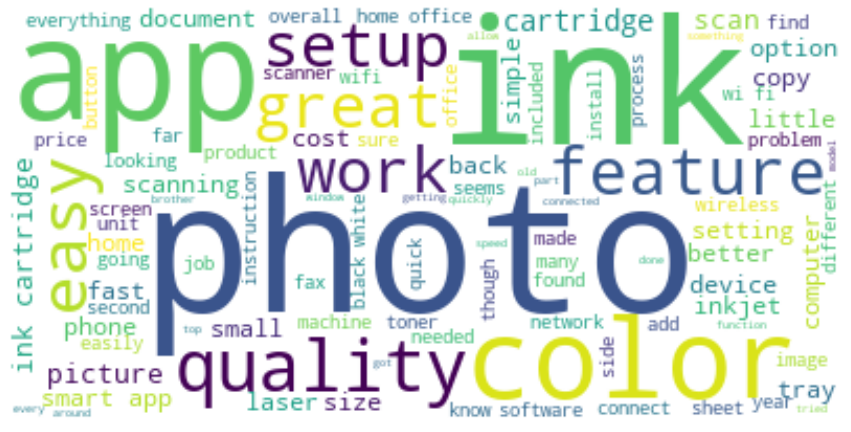

In [23]:
# Word cloud
# Create word cloud of HP
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud = WordCloud(background_color="white", 
                              max_words=100, 
                             ).generate(string)

# view the wordcloud
plt.figure(figsize=(15,8) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [24]:
# create a Pandas dataframe containing the tokens 
# (words) and their frequencies
freq_df = pd.DataFrame.from_dict(word_freq, orient='index').reset_index()

# rename the columns to "word" and "freq"
freq_df.columns=["word", "freq"]

# sort the dataframe so that the most frequent word is 
# at the top and view the first 3 rows
freq_df.sort_values(by="freq", ascending=False).head(10)

,word,freq
80,ink,1401
3,photo,841
100,app,824
16,cartridge,635
81,easy,625
94,color,615
6,quality,572
91,setup,547
5,great,491
202,scan,442


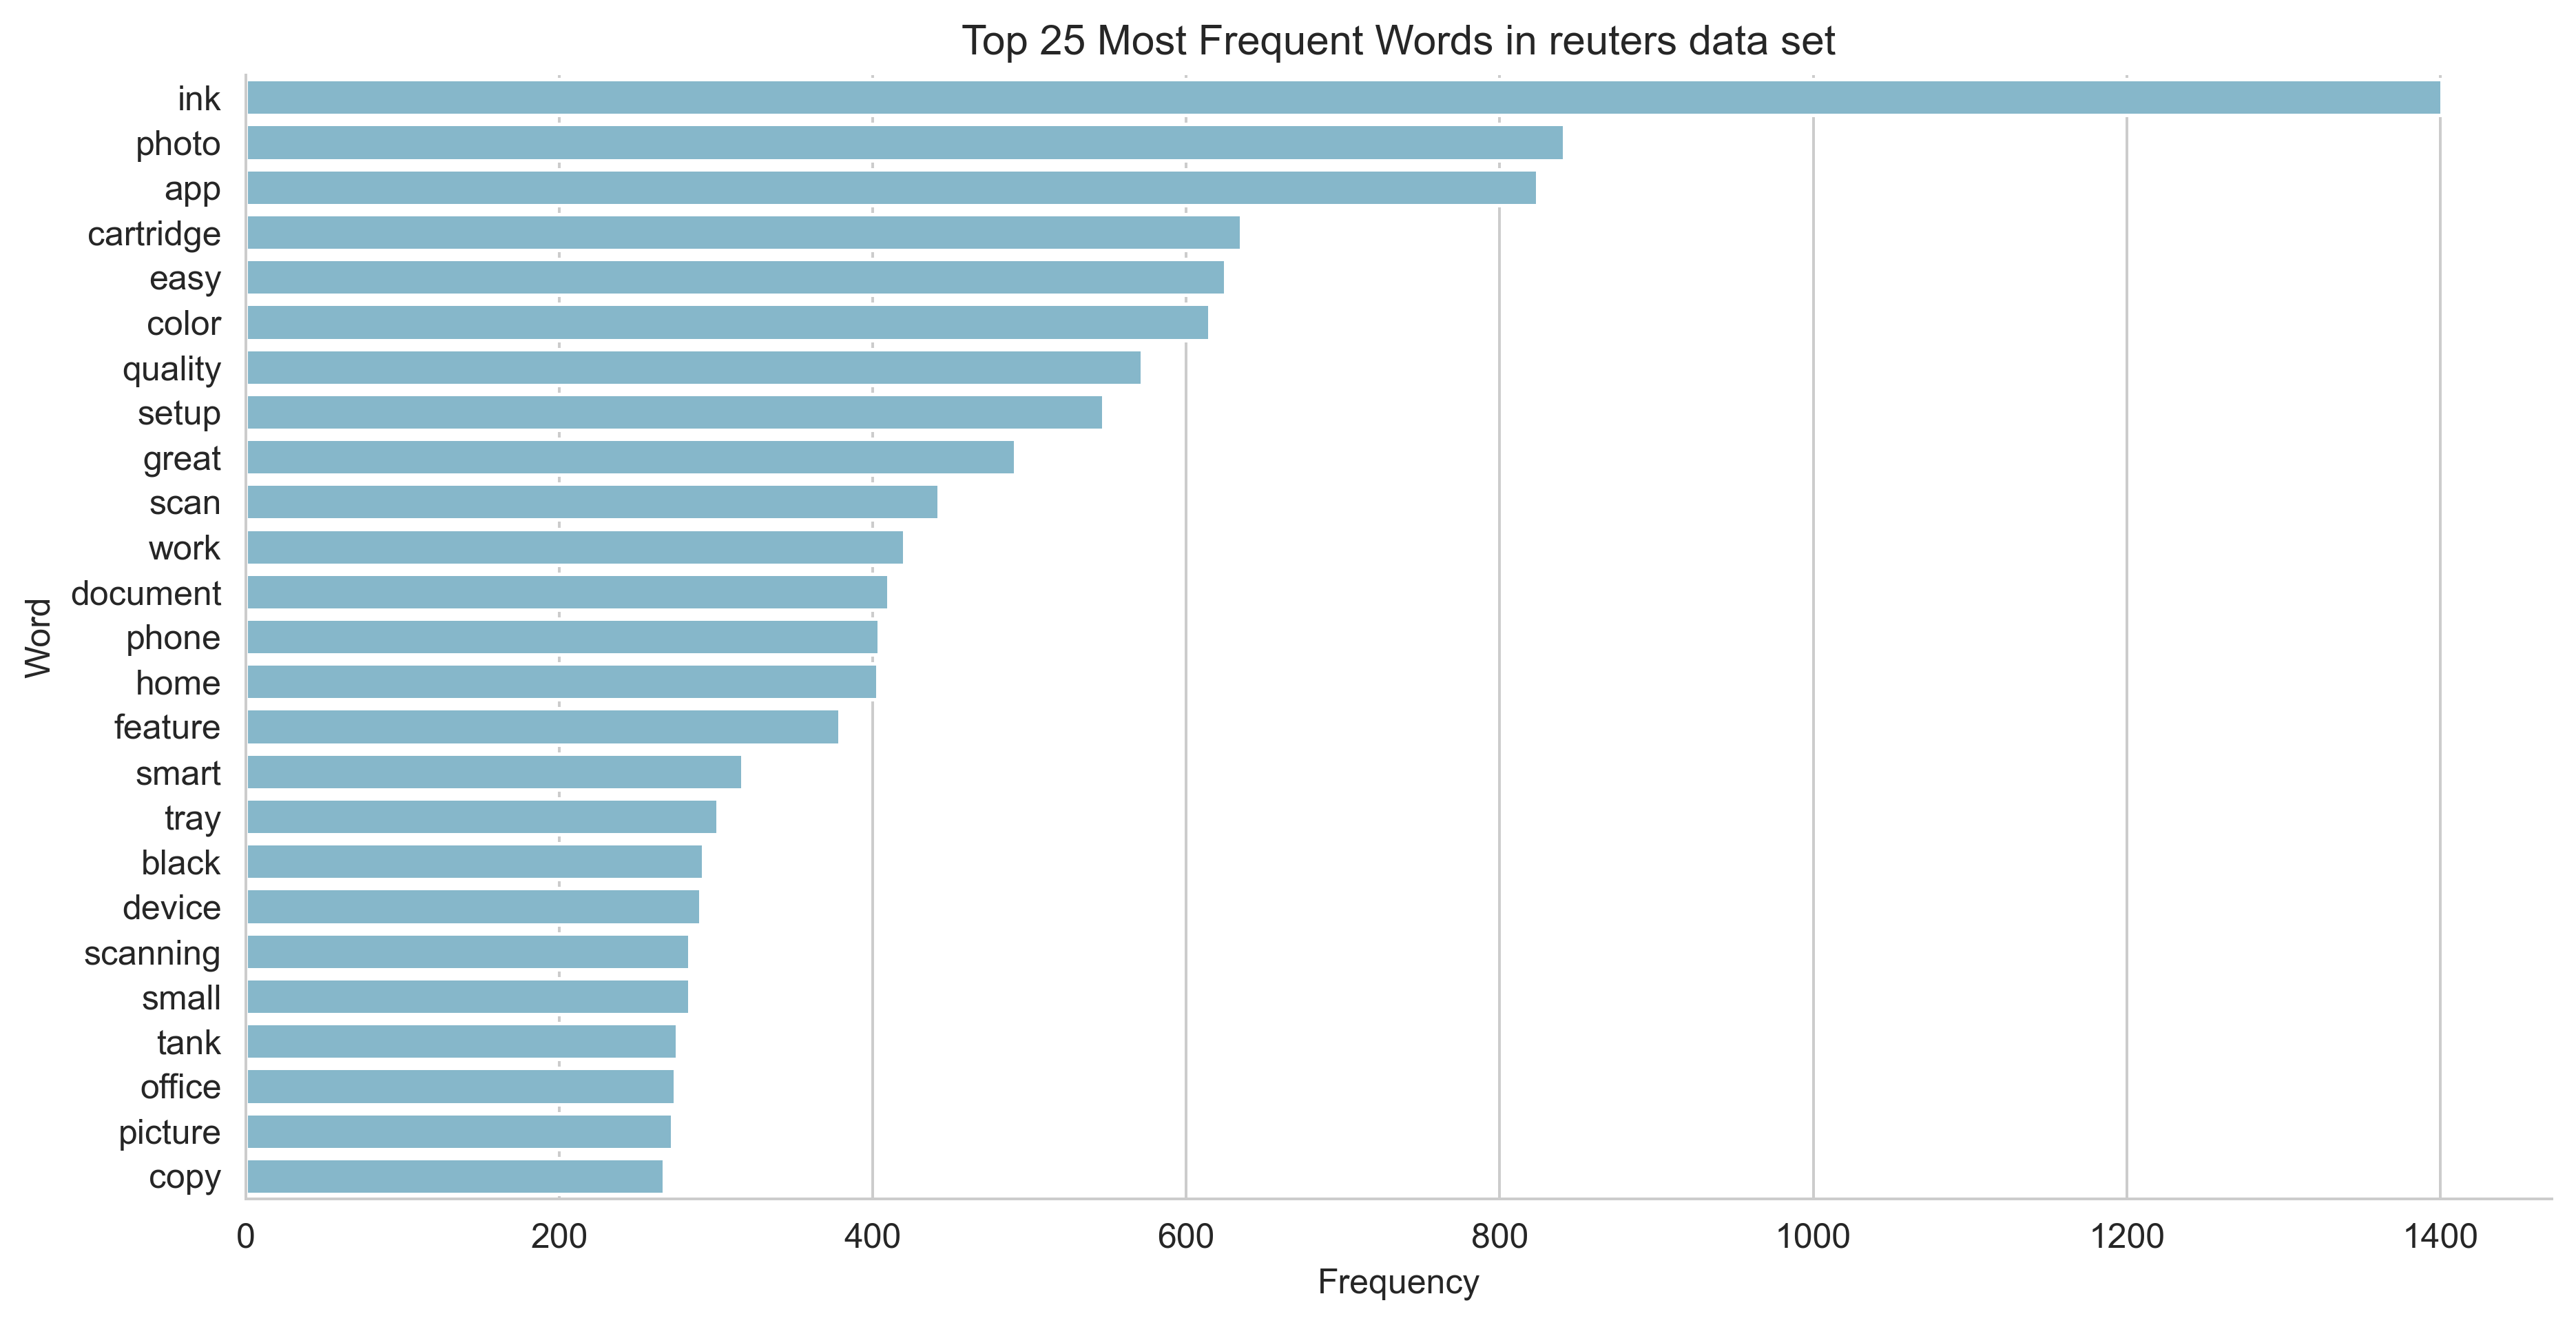

In [25]:
import seaborn as sns
sns.set_style("whitegrid");   # chart background style
plt.rcParams['figure.dpi'] = 360
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=freq_df.sort_values(by="freq", ascending=False).head(25),
            y="word",
            x="freq", 
            color='#7bbcd5')
plt.ylabel("Word")
plt.xlabel("Frequency")
plt.title("Top 25 Most Frequent Words in reuters data set")
sns.despine()

In [26]:
# Bigram frenquency
bigrams = nltk.bigrams(words)
frequence = nltk.FreqDist(bigrams)
b_most_common=frequence.most_common(20)
b_most_common

[(('ink', 'cartridge'), 253),
 (('smart', 'app'), 170),
 (('home', 'office'), 116),
 (('black', 'white'), 101),
 (('wi', 'fi'), 100),
 (('ink', 'tank'), 89),
 (('document', 'feeder'), 84),
 (('instant', 'ink'), 82),
 (('touch', 'screen'), 73),
 (('double', 'sided'), 52),
 (('mobile', 'device'), 46),
 (('setup', 'process'), 45),
 (('copy', 'scan'), 43),
 (('control', 'panel'), 41),
 (('small', 'office'), 41),
 (('usb', 'cable'), 40),
 (('super', 'easy'), 40),
 (('work', 'great'), 38),
 (('easy', 'setup'), 38),
 (('setup', 'easy'), 38)]

In [27]:
# create bigram frequency 
# (words) and their frequencies
b_freq_df = pd.DataFrame.from_dict(frequence, orient='index').reset_index()

# rename the columns to "word" and "freq"
b_freq_df.columns=["bigram word", "freq"]

# sort the dataframe so that the most frequent word is 
# at the top and view the first 3 rows
b_freq_df.sort_values(by="freq", ascending=False).head(10)

,bigram word,freq
92,"(ink, cartridge)",253
517,"(smart, app)",170
379,"(home, office)",116
824,"(black, white)",101
1823,"(wi, fi)",100
989,"(ink, tank)",89
3223,"(document, feeder)",84
1027,"(instant, ink)",82
2116,"(touch, screen)",73
1208,"(double, sided)",52


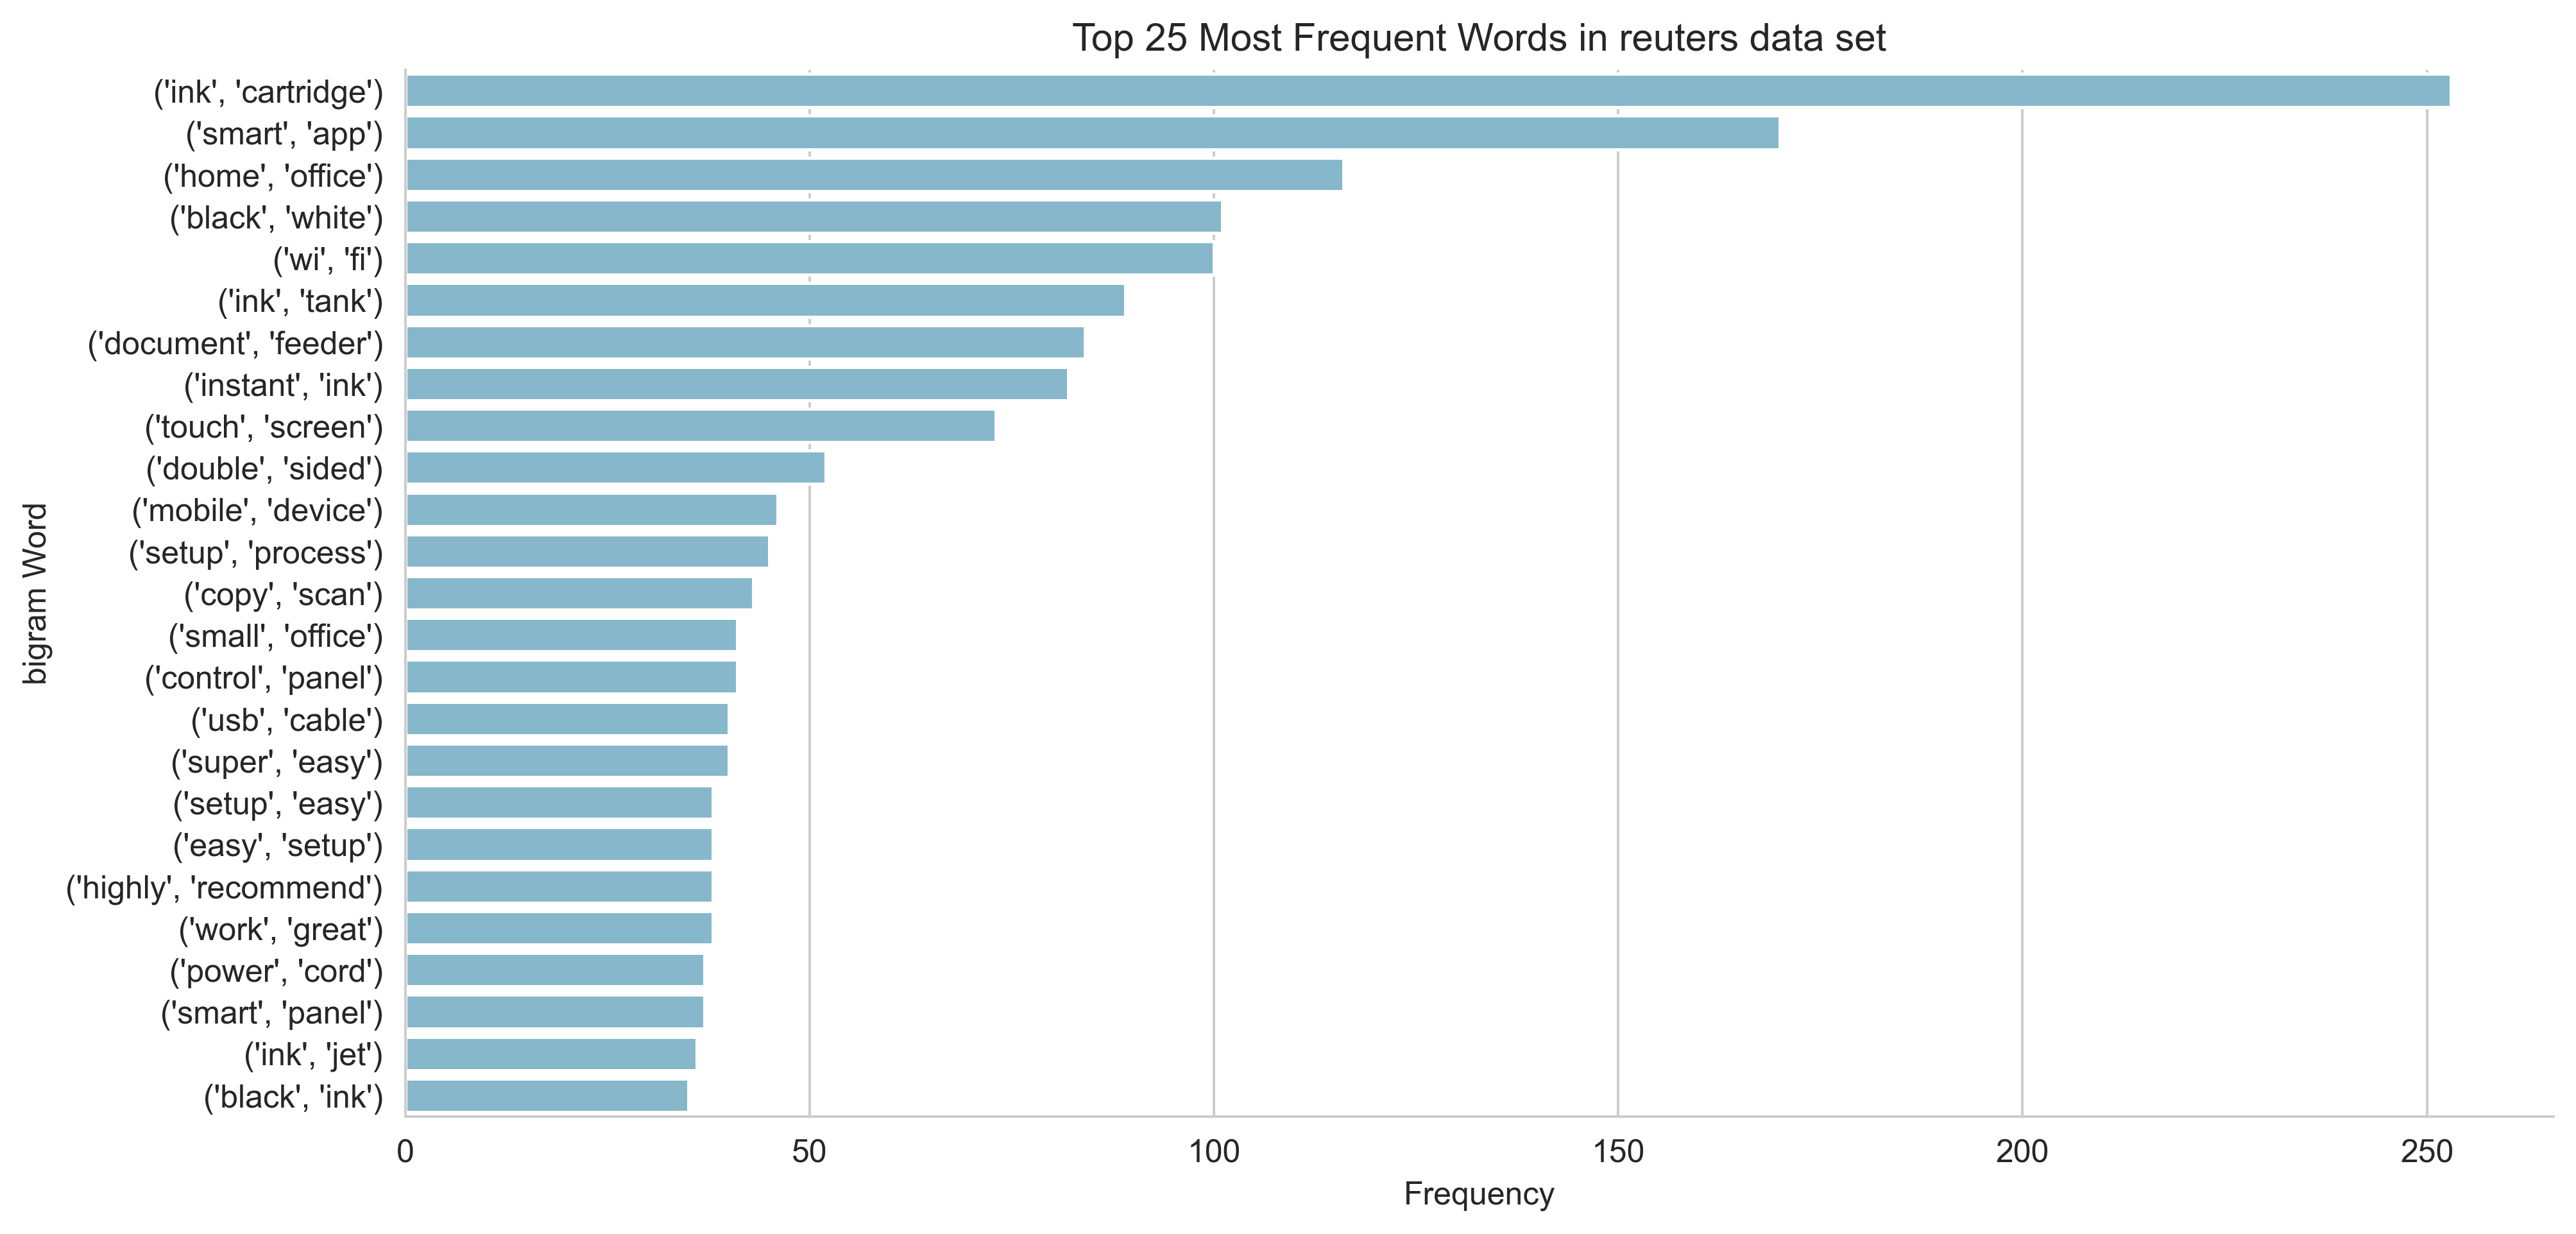

In [28]:
sns.set_style("whitegrid");   # chart background style
plt.rcParams['figure.dpi'] = 360
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=b_freq_df.sort_values(by="freq", ascending=False).head(25),
            y="bigram word",
            x="freq", 
            color='#7bbcd5')
plt.ylabel("bigram Word")
plt.xlabel("Frequency")
plt.title("Top 25 Most Frequent Words in reuters data set")
sns.despine()

In [29]:
# Bigram frenquency
trigrams = nltk.trigrams(words)
t_frequence = nltk.FreqDist(trigrams)
t_most_common=t_frequence.most_common(20)
t_most_common

[(('smart', 'panel', 'app'), 28),
 (('automatic', 'document', 'feeder'), 27),
 (('instant', 'ink', 'program'), 24),
 (('received', 'charge', 'beta'), 24),
 (('charge', 'beta', 'test'), 24),
 (('beta', 'test', 'review'), 24),
 (('black', 'white', 'color'), 18),
 (('download', 'smart', 'app'), 17),
 (('auto', 'document', 'feeder'), 17),
 (('tray', 'hold', 'sheet'), 15),
 (('home', 'small', 'office'), 13),
 (('color', 'black', 'white'), 12),
 (('smart', 'app', 'phone'), 12),
 (('expensive', 'ink', 'cartridge'), 12),
 (('filling', 'ink', 'tank'), 11),
 (('wi', 'fi', 'network'), 11),
 (('color', 'ink', 'cartridge'), 10),
 (('ink', 'last', 'year'), 10),
 (('recommend', 'anyone', 'looking'), 10),
 (('black', 'ppm', 'color'), 10)]

In [30]:
# create bigram frequency 
# (words) and their frequencies
t_freq_df = pd.DataFrame.from_dict(t_frequence, orient='index').reset_index()

# rename the columns to "word" and "freq"
t_freq_df.columns=["trigram word", "freq"]

# sort the dataframe so that the most frequent word is 
# at the top and view the first 3 rows
t_freq_df.sort_values(by="freq", ascending=False).head(10)

,trigram word,freq
4133,"(smart, panel, app)",28
5601,"(automatic, document, feeder)",27
53941,"(beta, test, review)",24
53940,"(charge, beta, test)",24
53939,"(received, charge, beta)",24
2275,"(instant, ink, program)",24
876,"(black, white, color)",18
1752,"(download, smart, app)",17
3400,"(auto, document, feeder)",17
15115,"(tray, hold, sheet)",15


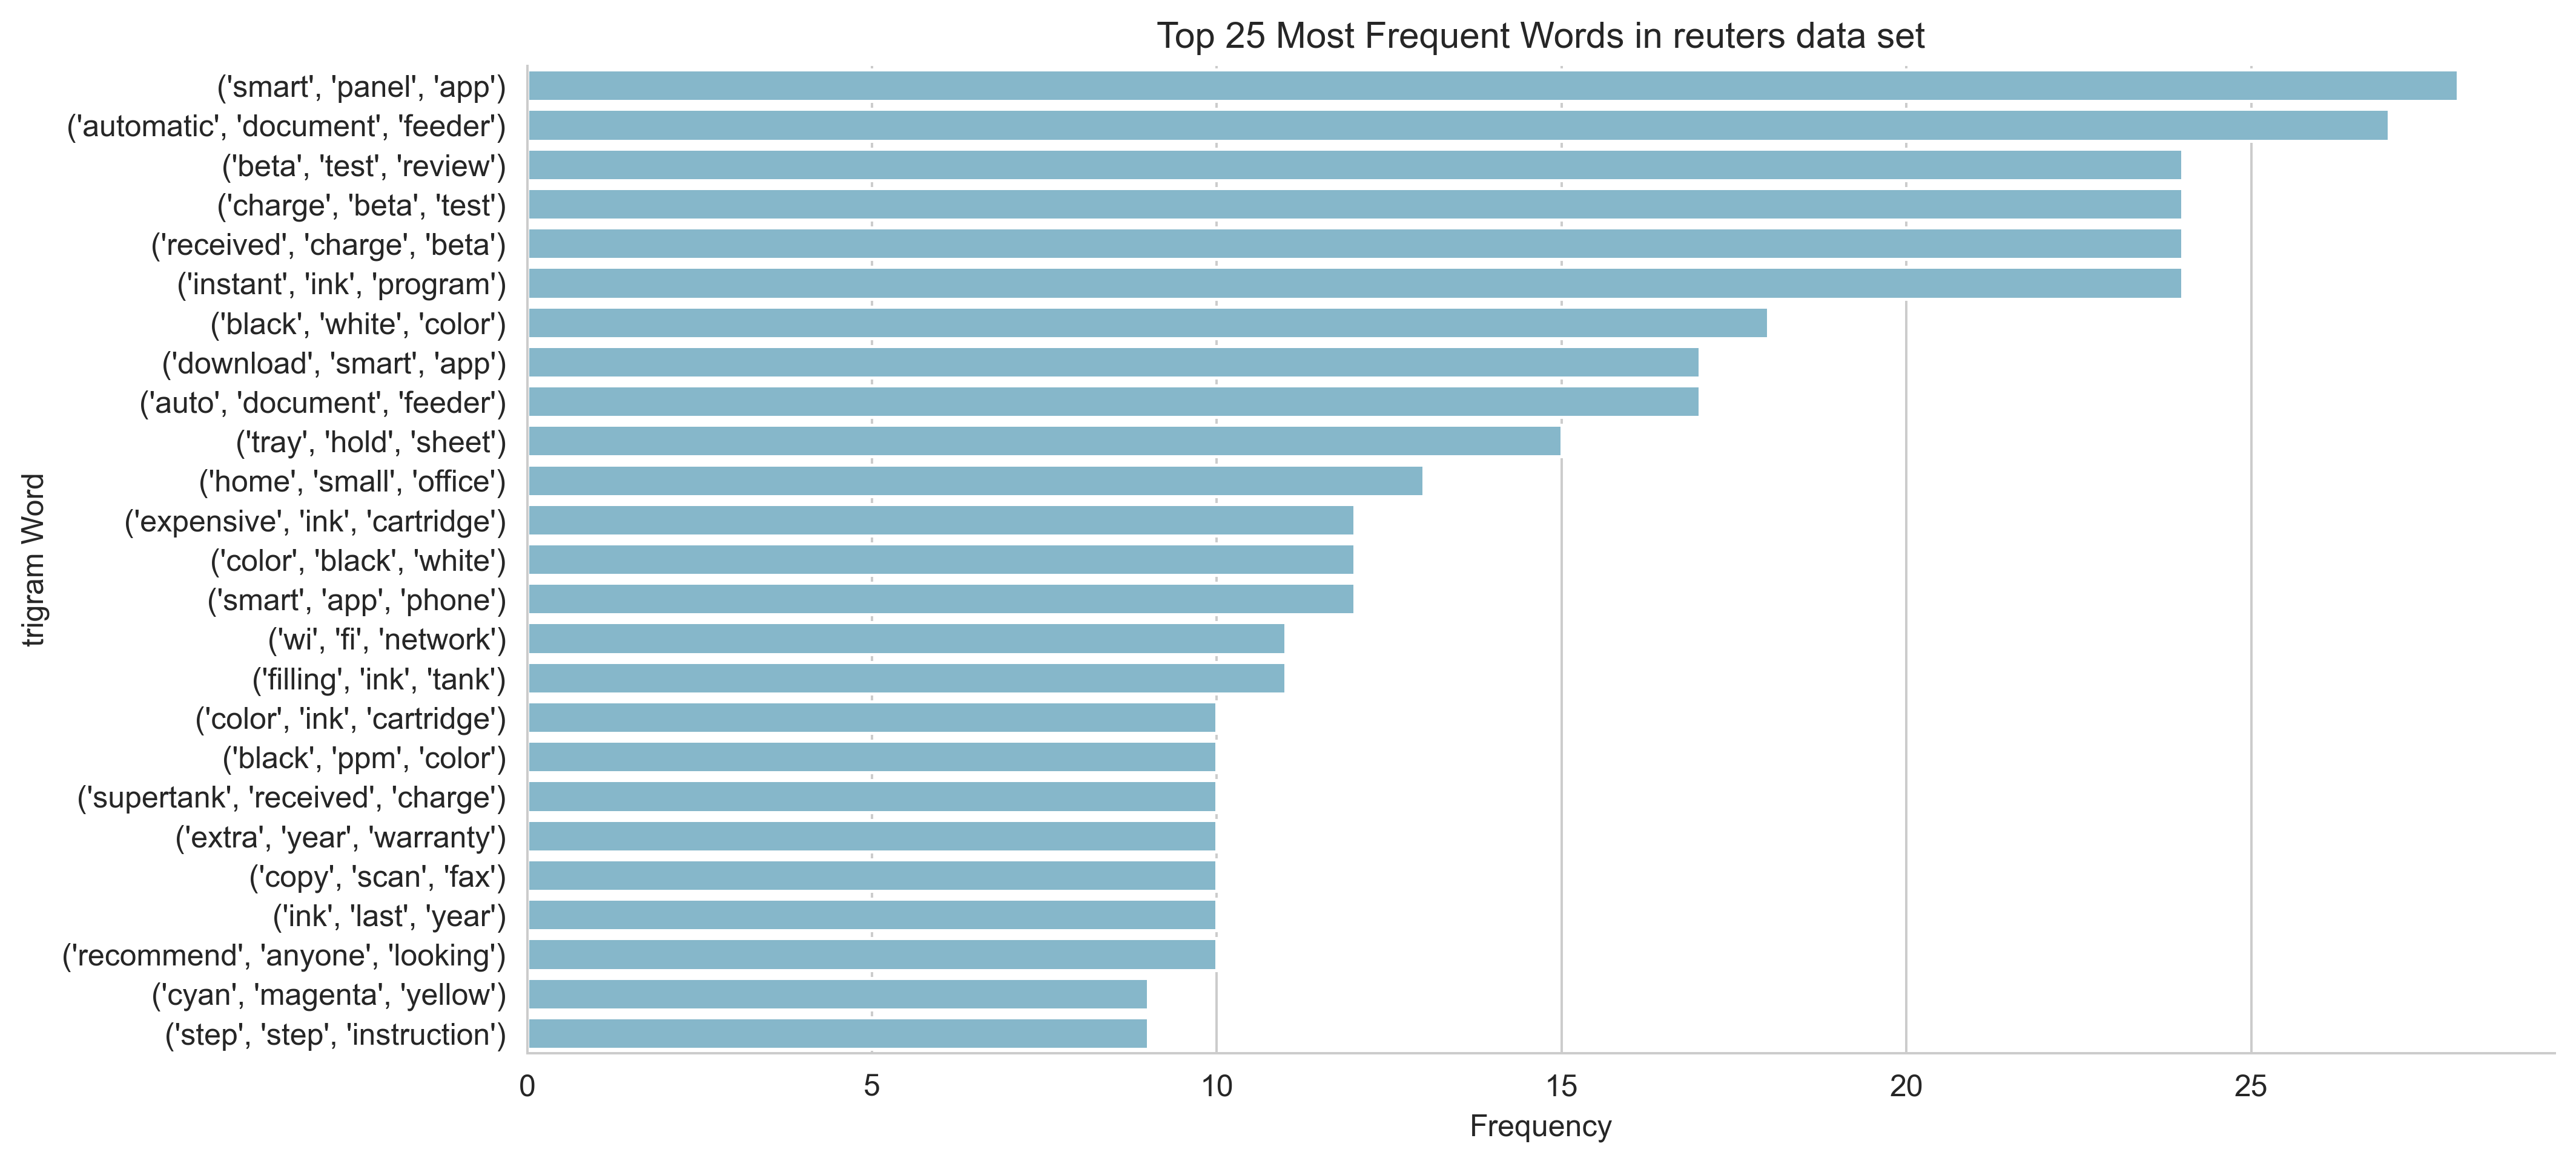

In [31]:
sns.set_style("whitegrid");   # chart background style
plt.rcParams['figure.dpi'] = 360
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=t_freq_df.sort_values(by="freq", ascending=False).head(25),
            y="trigram word",
            x="freq", 
            color='#7bbcd5')
plt.ylabel("trigram Word")
plt.xlabel("Frequency")
plt.title("Top 25 Most Frequent Words in reuters data set")
sns.despine()